### Tarea Semanal 1

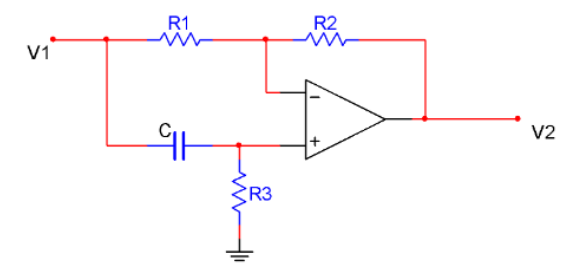

1) Obtener la función transferencia V2V1 ( módulo , fase y diagrama de polos y ceros).

Tensión Va:   
V<sub>A</sub> = V<sub>1</sub> $\cdot$ $\frac{R_3}{1/SC1 + R_3}$

Nodo 1:  
$\frac{V_1 - V_A}{R_1}$ = $\frac{-V_2 + V_A}{R_2}$  
$\frac{V_1}{R_1}$ + $\frac{V_2}{R_2}$ = $\frac{V_A}{R1}$ + $\frac{V_A}{R_2}$  
$\frac{V_1}{R_1} + \frac{V_2}{R_2}$ = $V_A \cdot \frac{R_2+R_1}{R_1 \cdot R_2}$  
$R_2 \cdot V_1 + R_1 \cdot V_2$ = $V_A \cdot (R_2 + R_1)$  

Remplazando Va en Nodo 1:  
$R_2 \cdot V_1 + R_1 \cdot V_2$ = V<sub>1</sub> $\cdot \frac{R_3}{1/SC1 + R_3} \cdot (R_2 + R_1)$  
$V_1 \cdot (R_2 - \frac{R_3}{1/SC1 + R_3} \cdot (R_2 + R_1))$ = $- R_1 \cdot V_2$  
$\frac{V_2}{V_1}$ = $- \frac{1}{R_1} \cdot (R_2 - \frac{R_3R_2+R_3R_1}{\frac{1+SC_1R_3}{SC_1}})$   
$\frac{V_2}{V_1}$ = $- \frac{1}{R_1} \cdot (R_2 - \frac{SC_1 \cdot (R_3R_2+R_3R_1)}{1+SC_1R_3})$   
$\frac{V_2}{V_1}$ = $- \frac{1}{R_1} \cdot \frac{R_2 \cdot (1+SC_1R_3) - SC_1 \cdot (R_3R_2+R_3R_1)}{1+SC_1R_3}$  
$\frac{V_2}{V_1}$ = $- \frac{1}{R_1} \cdot \frac{R_2 - SC_1R_3R_1}{1+SC_1R_3}$  
$\frac{V_2}{V_1}$ = $\frac{s - \frac{R_2}{C_1R_3R_1}}{s + \frac{1}{C_1R_3}}$

Modulo:  
$|\frac{V_2}{V_1}|$ = $|\frac{s - \frac{R_2}{C_1R_1R_3}}{s + \frac{1}{C_1R_3}}|$

Fase:  
$\phi$ = $\arctan{\frac{w}{\frac{-R_2}{C_1R_1R_3}}} - \arctan{\frac{w}{\frac{1}{C_1R_3}}}$

Polos y ceros:  
Un cero en $\frac{R_2}{C_1R_1R_3}$  
Un polo en $\frac{-1}{C_1R_3}$

2) Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?

$W_0$ = $\frac{1}{C_1R_3}$  
$\frac{V_2}{V_1}$ = $\frac{s - W_0 \cdot \frac{R_2}{R_1}}{s + W_0}$  

En este caso la w0, si utilizamos el circuito como pasa-todo osea con $R_2 = R_1$, no nos indicará unba frecuencia de corte para la amplitud. Sino más bien nos indicará donde se ubicará el cambio de fase.

### Simulación en Python
3) Simule la función transferencia normalizada (Python, Matlab, etc.).

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

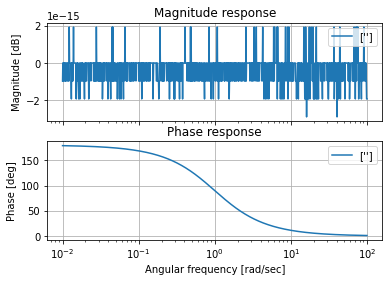

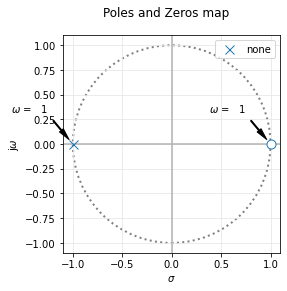

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 10 12:32:41 2022

@author: marti
"""

from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

R1 = 1000
R2 = 1000

w0 = 1

my_tf = TransferFunction([1,(-R2/R1)*w0],[1,w0])

bodePlot(my_tf,1)

pzmap(my_tf,2)


### Simulación en LTSpice
4) Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  $\frac{R2}{R1}$=1; R3=1kΩ y C=1µF  


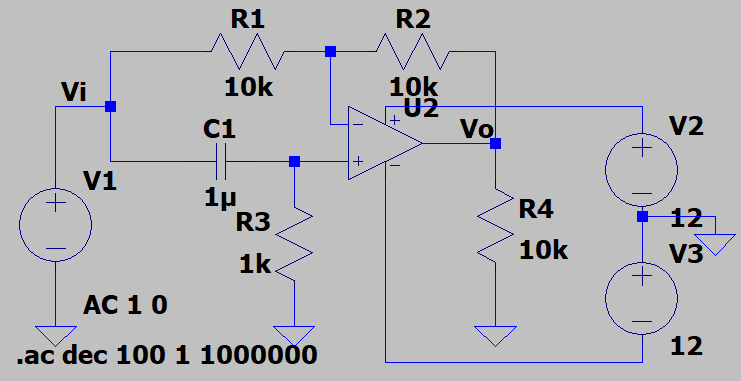
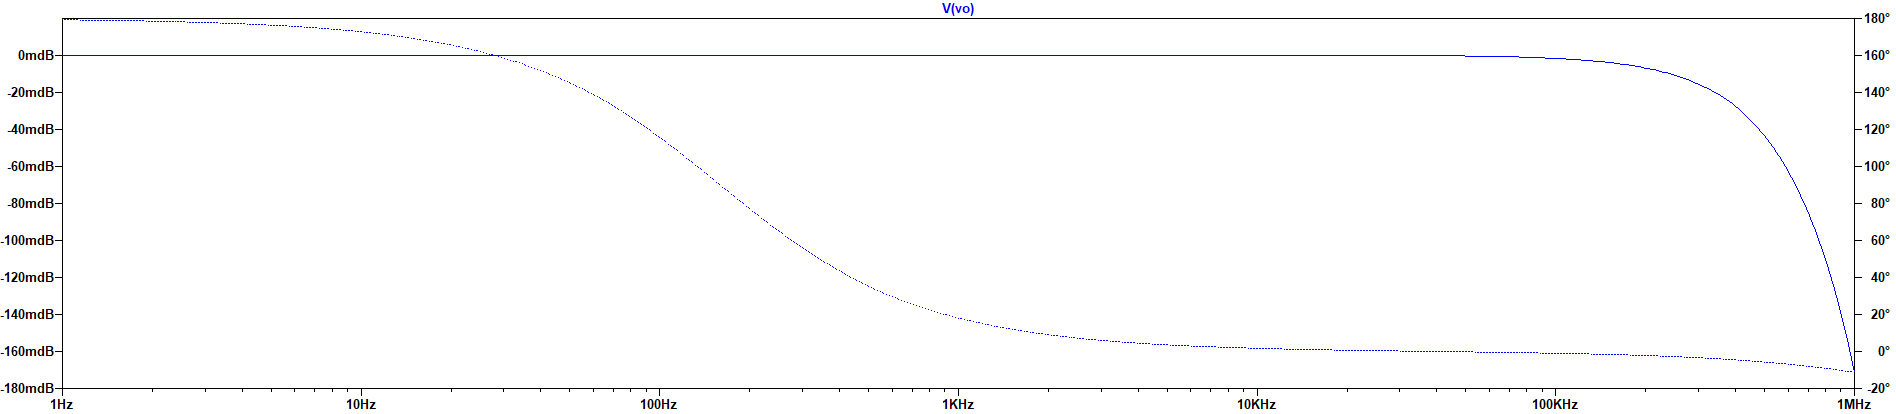

5) ¿Qué utilidad podría tener este tipo de circuitos pasa-todo?  
Los filtros pasa-todo sirven más que nada para cuando quiero modificar la fase de una señal sin modificar su amplitud

### Red normalizada que responde a la funcion en 3)

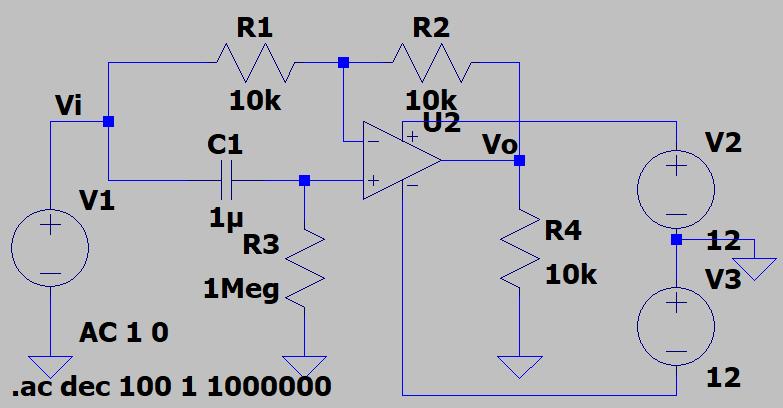  
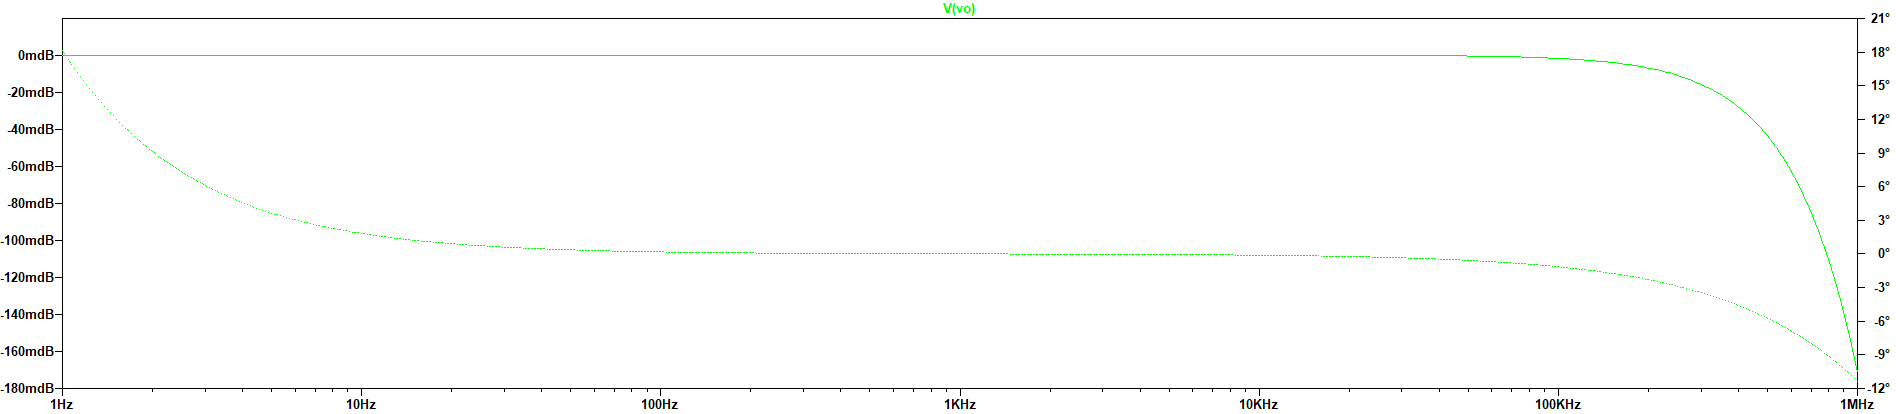

### Simulacion con SymPy

In [2]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

Vi, Vo, Vx = sp.symbols("Vi, Vo, Vx")
G1, G2, Y1, Y2, R, C = sp.symbols("G1, G2, Y1, Y2, R, C")

aa = sp.solve([ 
                Vx*(Y1+Y2)-Vi*Y1, 
                Vx*(G1+G2) -Vi*G1 -Vo*G2
                ], 
                [Vi, Vo])

transf_func = aa[Vo]/aa[Vi]

tf7a = transf_func.subs(Y1, s*C)
tf7a = tf7a.subs(Y2, 1/R)

num, den = sp.fraction(sp.simplify(sp.expand(tf7a)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

tf7a_final = sp.Mul(k,num/den, evaluate=False)


print('Girador tarea semanal')
display(tf7a_final)
display(Math( r' \omega_o = ' + sp.latex(wo) ))


Girador tarea semanal


1*((s - G1/(C*G2*R))/(s + 1/(C*R)))

<IPython.core.display.Math object>